### Introduction

In the era of digital music, recommendation systems play a vital role in personalizing user experiences. In this project, we build a Spotify music recommendation system using unsupervised learning techniques like **KMeans Clustering** and **PCA** for dimensionality reduction.


### 📦 Importing Libraries

We start by importing all necessary libraries for data analysis, visualization, and machine learning.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 📁 Loading the Dataset

Let’s load the Spotify dataset which contains various features of tracks including audio features and metadata.

In [2]:
# Load the dataset
file_path = r'C:\Users\T VIJAYA BALAJI\Desktop\projects\spotify_recommendation_system\spotify dataset.csv'  # Update this to file path
spotify_data = pd.read_csv(file_path)

### 🧹 Data Cleaning

To ensure the quality of our model, we remove rows with missing data and convert the `track_album_release_date` column to a proper datetime format.


In [ ]:
# Data Preprocessing

# Handling missing values
spotify_data_cleaned = spotify_data.dropna()

# Convert 'track_album_release_date' to datetime format
#spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'])
spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'], errors='coerce')


C:\Users\T VIJAYA BALAJI\AppData\Local\Temp\ipykernel_32344\206230197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['track_album_release_date'] = pd.to_datetime(spotify_data_cleaned['track_album_release_date'], errors='coerce')


### 📊 Exploratory Data Analysis (EDA)

Before modeling, it's crucial to understand our data. We visualize the distribution of track popularity and the spread of genres using seaborn plots.


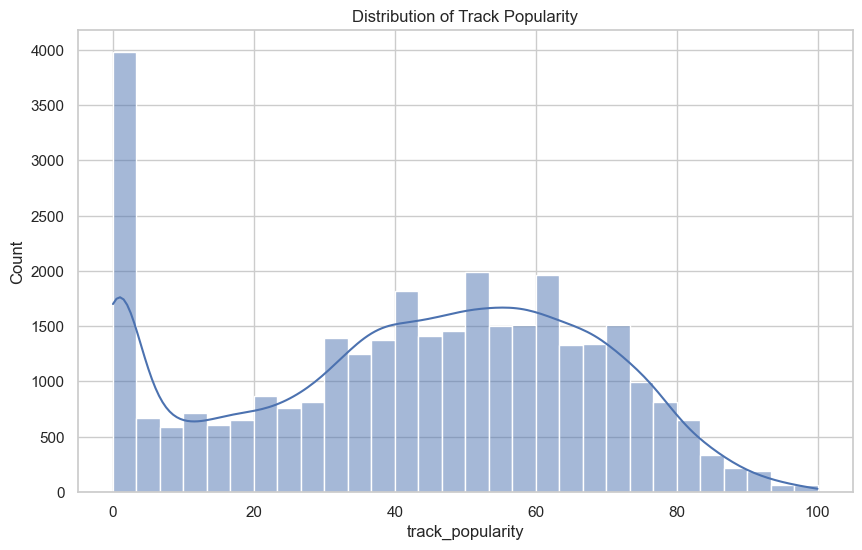

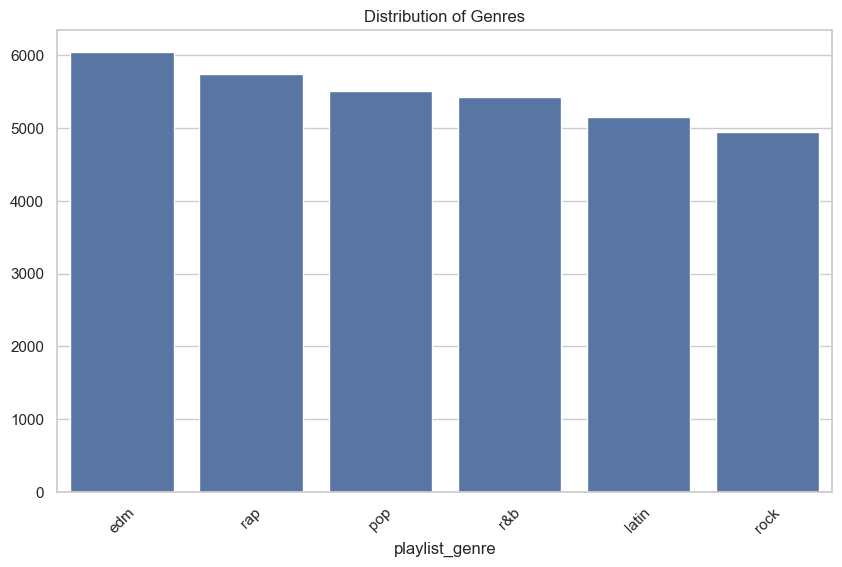

In [4]:
# Exploratory Data Analysis (EDA) and Visualization

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Track Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# Genre Distribution
plt.figure(figsize=(10, 6))
genre_counts = spotify_data_cleaned['playlist_genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres')
plt.xticks(rotation=45)
plt.show()

### 🔗 Feature Correlation

We use a heatmap to understand the correlation between different audio features. This helps us identify redundancy and select meaningful features for clustering.


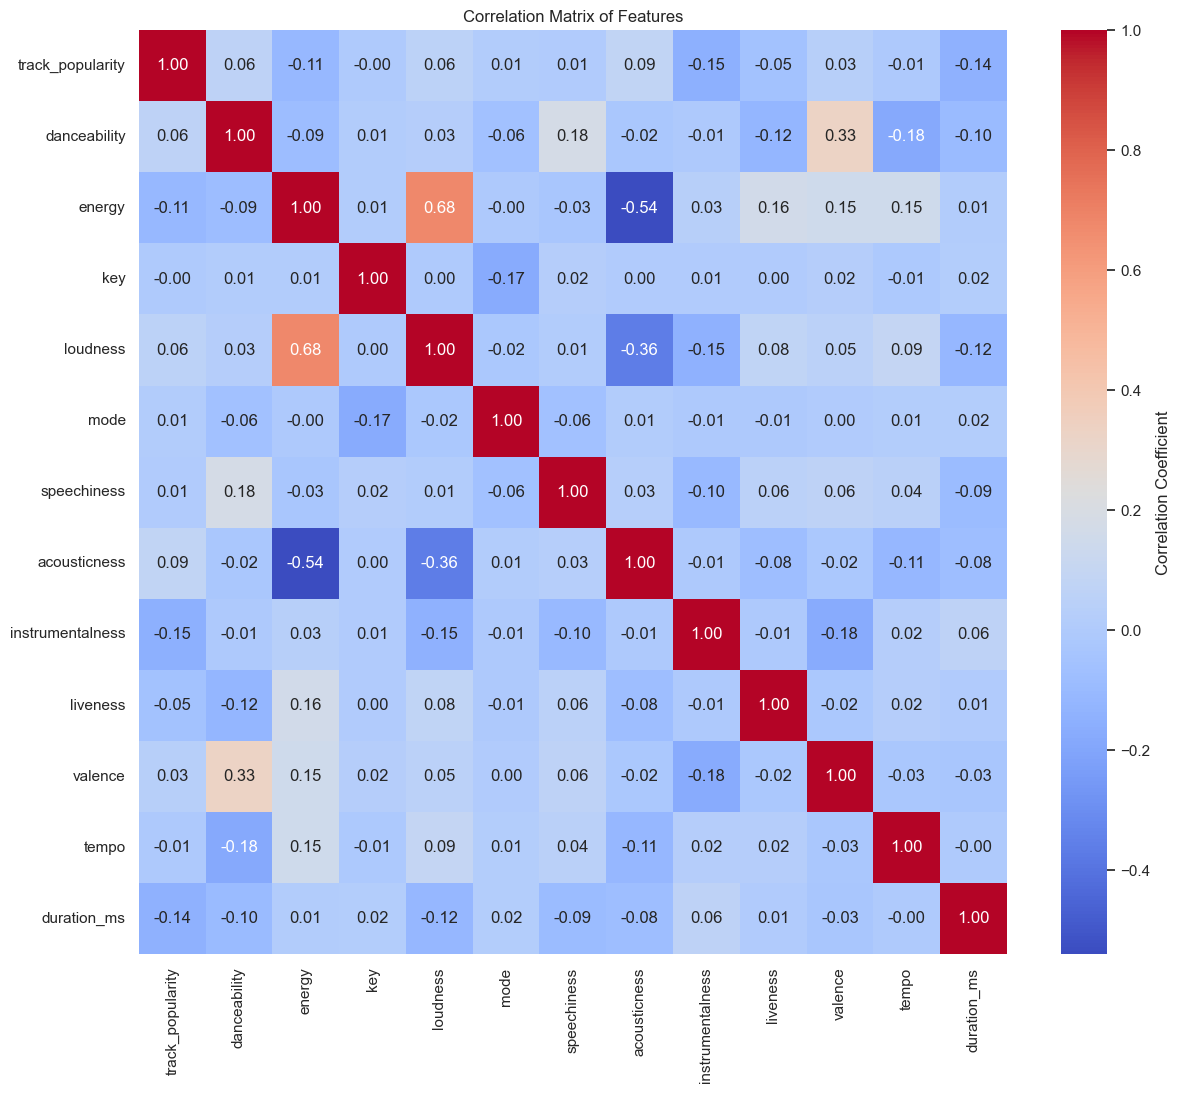

In [5]:
# Correlation Matrix of Features

# Calculate and plot the correlation matrix
corr_matrix = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

### 🔧 Feature Selection & Scaling

We choose a subset of important features (like energy, tempo, valence, etc.) and apply standardization to normalize the scales. This is essential for clustering algorithms like KMeans to perform well.



### 🤖 Clustering with KMeans

Using KMeans, we cluster the songs into 5 groups. This step helps categorize tracks into similar sounding groups based on their audio features.


C:\Users\T VIJAYA BALAJI\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\T VIJAYA BALAJI\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\radioconda\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\radioconda\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\radioconda\Lib\subprocess.py", line 154

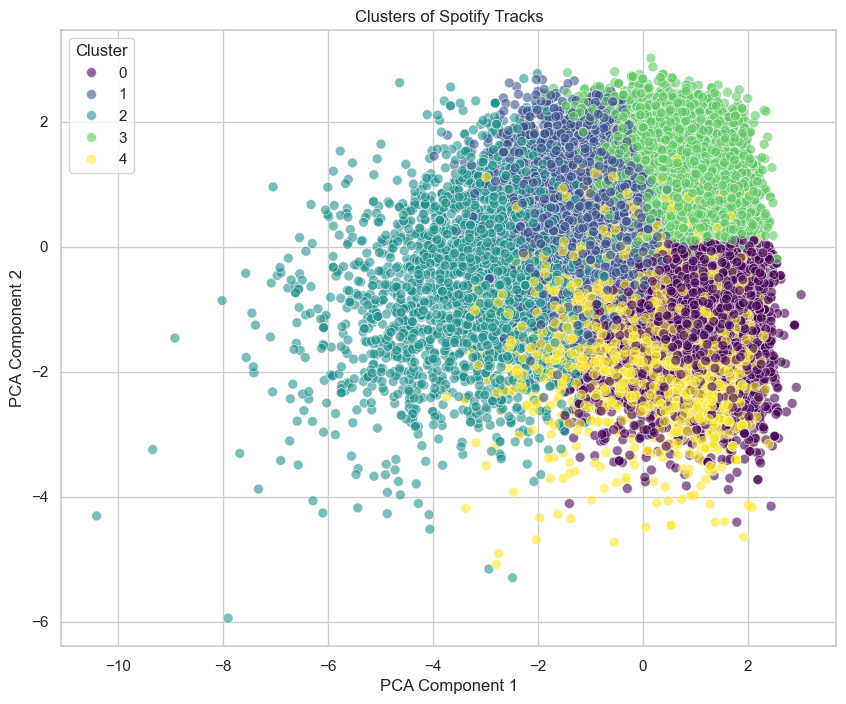

In [6]:
# Clustering

# Feature selection for clustering
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Number of clusters is chosen arbitrarily
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
spotify_data_cleaned['cluster'] = kmeans.labels_

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='cluster', data=spotify_data_cleaned, palette='viridis', s=50, alpha=0.6)
plt.title('Clusters of Spotify Tracks')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [7]:
# Features selected for clustering
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
spotify_data_cleaned['cluster'] = kmeans.labels_

# Recommendation function
def recommend_songs(song_id, spotify_data, num_recommendations=5):
    """
    Recommends songs from the same cluster as the input song.

    Parameters:
    - song_id: The ID of the song for which recommendations are sought.
    - spotify_data: The DataFrame containing the Spotify dataset with cluster labels.
    - num_recommendations: The number of recommendations to return.

    Returns:
    - A DataFrame containing the recommended songs.
    """
    if song_id not in spotify_data['track_id'].values:
        print("Song ID not found in the dataset.")
        return None

    # Find the cluster of the input song
    song_cluster = spotify_data[spotify_data['track_id'] == song_id]['cluster'].values[0]

    # Filter songs from the same cluster
    recommended_songs = spotify_data[spotify_data['cluster'] == song_cluster]

    # Remove the input song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_id'] != song_id]

    # Randomly select songs from the same cluster
    recommendations = recommended_songs.sample(n=num_recommendations)

    return recommendations[['track_id', 'track_name', 'track_artist', 'cluster']]

# Example usage
song_id_example = spotify_data_cleaned['track_id'].iloc[0]
recommendations = recommend_songs(song_id_example, spotify_data_cleaned, num_recommendations=5)
print(recommendations)

                     track_id  \
23041  1ZDmxwg7Lywlx68b7SsJjj   
2444   7ACCDmXvdV7alpC7Cb0ush   
30670  2S5LNtRVRPbXk01yRQ14sZ   
20276  6RyaV7owmVU6fzEPE17sF1   
1961   1OOtq8tRnDM8kG2gqUPjAj   

                                              track_name     track_artist  \
23041                                           MEGATRON      Nicki Minaj   
2444                                              Vermin       dolorifics   
30670  I Don't Like It, I Love It (feat. Robin Thicke...         Flo Rida   
20276                                  Que Tire Pa Lante     Daddy Yankee   
1961                            Beat It - Single Version  Michael Jackson   

       cluster  
23041        3  
2444         3  
30670        3  
20276        3  
1961         3  


C:\Users\T VIJAYA BALAJI\AppData\Local\Temp\ipykernel_32344\3939651461.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.labels_
